In [19]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import seaborn as sns

# Предисловие

Данный датасет был выбран по тем причинам, что:\
а) отвечает условиям к датасету, представленными в задаче\
б) показался интересным для работы и *может* иметь хоть какую-то практическую ценность

# Датасет

In [2]:
# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")
path = path + "/Churn_Modelling.csv" 

print("Path to dataset files:", path)

Path to dataset files: C:\Users\troll\.cache\kagglehub\datasets\shrutimechlearn\churn-modelling\versions\1/Churn_Modelling.csv


In [8]:
df = pd.read_csv(path)

## Работа с данными

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Удалим колонки rowNumber & CustomerId & Surname
df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [11]:
# Преобразуем колонки География и Gender в категориональные признаки
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['Geography'])
ohe = OneHotEncoder(sparse_output=False)
cat_enc_ohe = ohe.fit_transform(df[['Geography']])
temp = pd.DataFrame(cat_enc_ohe, columns=ohe.get_feature_names_out(['Geography']))
df = pd.concat([df.drop(columns=['Geography']), temp], axis=1)

In [12]:
# Преобразуем колонки География и Gender в категориональные признаки
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['Gender'])
ohe = OneHotEncoder(sparse_output=False)
cat_enc_ohe = ohe.fit_transform(df[['Gender']])
temp = pd.DataFrame(cat_enc_ohe, columns=ohe.get_feature_names_out(['Gender']))
df = pd.concat([df.drop(columns=['Gender']), temp], axis=1)
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
# После преобразования данных проверим выборсы

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Исходя из данных можно сделать превадрительный вывод, что отравленных данных нет

In [ ]:
# Для каждого не категорионального признака рассмотрим их распределение

In [16]:
non_cat_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

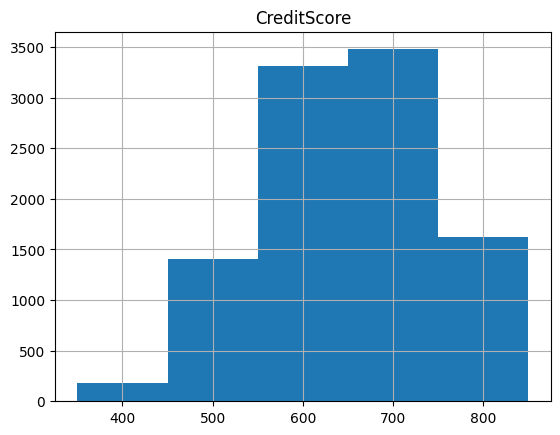

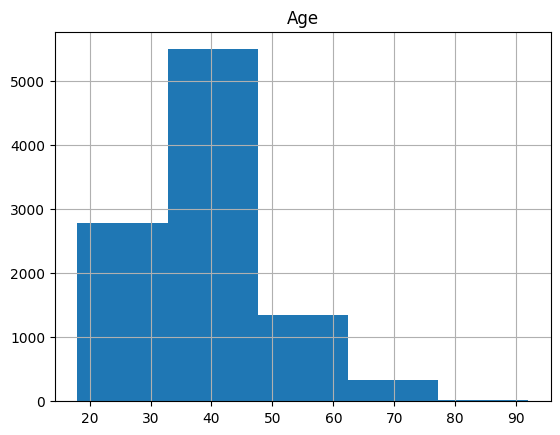

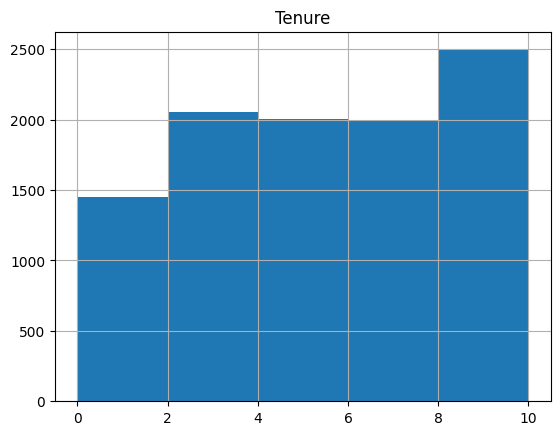

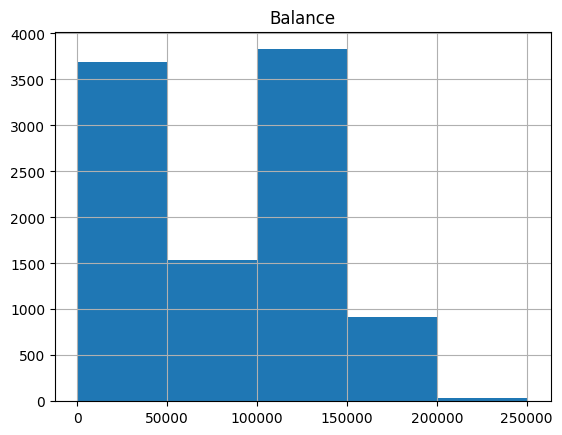

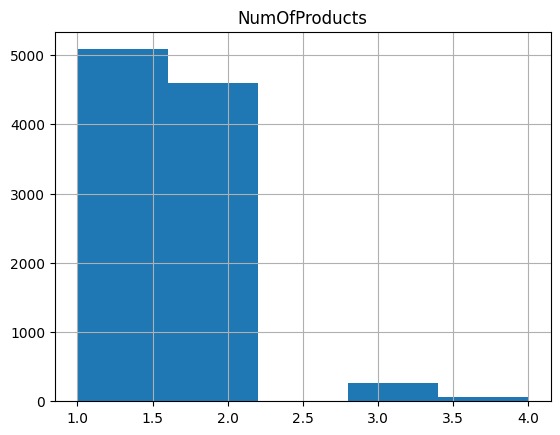

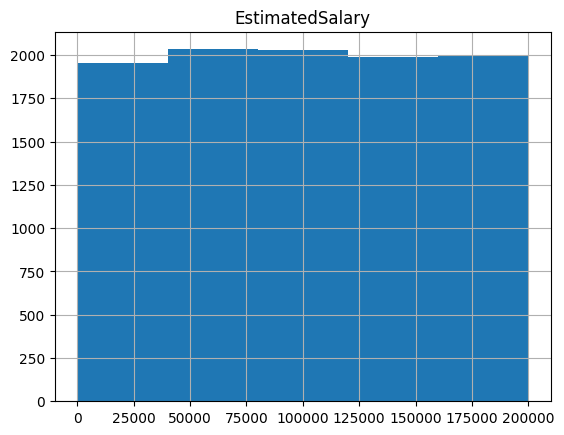

In [33]:
for non_cat_column in non_cat_columns:
    df.hist(non_cat_column, bins =5)

In [34]:
# исходя из распределения данных нельзя точно сказать, что есть какие-либо выбросы, так как в нашем датасете не имелось пропусков, то работу с ними опустим, но в обьщем случае для количественных признаков - медианное значение, а для категориональных - либо медианное, либо везде проставлять 0, зависит от целей и задач

# Решение задачи о классификации

# Выводы